#EDA#

In [ ]:
! pip3 install tensorflow

     |████████████████████████████████| 462 kB 5.4 MB/s 


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import re
import random
from tqdm import tqdm
import tensorflow as tf
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import urllib
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from collections import Counter, defaultdict
from keras.utils.data_utils import get_file
import json
from IPython.display import Image, display, clear_output


In [ ]:
train_damaged_list = os.listdir('/content/drive/MyDrive/case_study/data1a/training/00-damage')
train_not_damaged_list = os.listdir('/content/drive/MyDrive/case_study/data1a/training/01-whole')
test_damaged_list = os.listdir('/content/drive/MyDrive/case_study/data1a/validation/00-damage')
test_not_damaged_list = os.listdir('/content/drive/MyDrive/case_study/data1a/validation/01-whole')

In [ ]:
def plot_bar(class_labels,counts,name):
    plt.figure(figsize = (5,5))
    f = sns.barplot(x = classes,y =counts)
    plt.xlabel("Class labels", fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title("Number of Images in "+name+' folder', fontsize=15)
    plt.show()

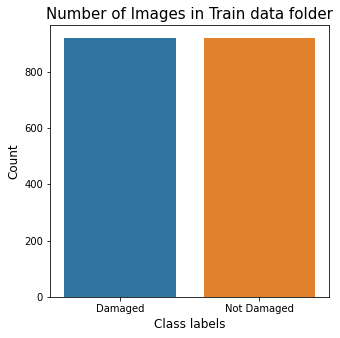

Number of Damaged images in train is 920
Number of Not Damaged images in train is 920


In [ ]:
classes = ['Damaged','Not Damaged']
counts = [len(train_damaged_list),len(train_not_damaged_list)]
plot_bar(classes,counts,'Train data')
for i in range(len(classes)):
    print('Number of '+classes[i]+' images in train is '+str(counts[i]))

**Observations:**

1)From the train plot we can see that the images we have for Damaged and Not damaged classes are equal.

2)There is no class imbalance.

3)Since the dataset we have is less we can enlarge the dataset using Data Augmentation.

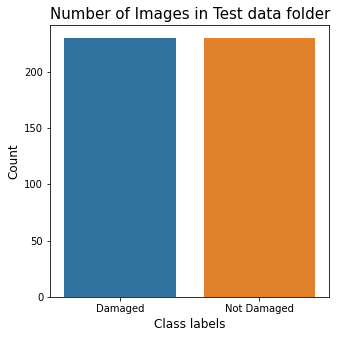

Number of Damaged images in test is 230
Number of Not Damaged images in test is 230


In [ ]:
classes = ['Damaged','Not Damaged']
counts = [len(test_damaged_list),len(test_not_damaged_list)]
plot_bar(classes,counts,'Test data')
for i in range(len(classes)):
    print('Number of '+classes[i]+' images in test is '+str(counts[i]))

**Observations:**

1)From the test plot we can see that the images we have for Damaged and Not damaged classes are equal.

2)Since the cars datasets are rare the test folder has less number of images.

In [ ]:
def img_shapes(files,path):
    shapes = []
    for i in files:
        img = cv2.imread(path+'/'+i)
        shapes.append(img.shape)
    return shapes

In [ ]:
train_dmg = img_shapes(train_damaged_list,'/content/drive/MyDrive/case_study/data1a/training/00-damage')
train_no_dmg = img_shapes(train_not_damaged_list,'/content/drive/MyDrive/case_study/data1a/training/01-whole')
train_df = pd.DataFrame(list(zip(train_dmg,train_no_dmg)),columns = classes)


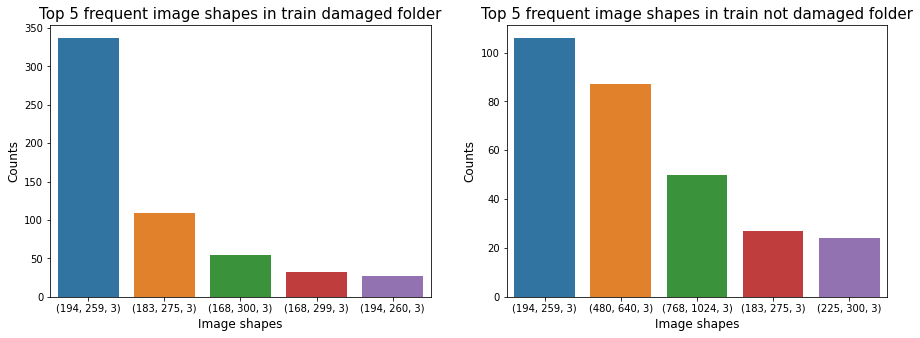

No of unique image shapes in train damaged are  132
No of unique image shapes in train not damaged are  385


In [ ]:
#Damaged train
num = [str(i) for i in train_df['Damaged'].value_counts().index[:5]]
counts_val = [i for i in train_df['Damaged'].value_counts()[:5]]
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.barplot(x = num,y =counts_val)
plt.xlabel("Image shapes", fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title("Top 5 frequent image shapes in train damaged folder", fontsize=15)

#Not Damaged train
num = [str(i) for i in train_df['Not Damaged'].value_counts().index[:5]]
counts_val = [i for i in train_df['Not Damaged'].value_counts()[:5]]
plt.subplot(1,2,2)
sns.barplot(x = num,y =counts_val)
plt.xlabel("Image shapes", fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title("Top 5 frequent image shapes in train not damaged folder", fontsize=15)
plt.show()

print('No of unique image shapes in train damaged are ',len(train_df['Damaged'].unique()))
print('No of unique image shapes in train not damaged are ',len(train_df['Not Damaged'].unique()))

**Observations:**

1)From the above plot we can see that the (194,259) image shape are more abudant than others in damaged folder and not damaged folder.

2)But in not damaged folder the counts of images with (194,259) and (480,640) are almost equal.

3)There are 132 unique image shapes present in train damaged folder.

4)There are 385 unique image shapes present in train not damaged folder.

#Data Augmentation#

Since the data we have is less we can synthetically increase the dataset using Data augmentation.I will be using two types of data augmentation as shown below.

1)Enlarging the dataset twice using random rotation between -20 and 20 degrees and horizontal flip transformations.

2)Enlarging the dataset twice using random rotation between -20 and 20, shear-range of 0.2, zoom-range of 0.2 and horizontal-flip.

In [ ]:
lists = [['damaged','not_damaged'],['front','rear','side'],['minor','moderate','severe']]
data = ['data_1','data_2','data_3']

In [ ]:
paths = []
def create_folders(name,class_lists,data):
    os.mkdir(name)
    for i in range(3):
        os.mkdir(name+'/'+data[i])
        for j in ['train','test']:
            temp_paths = []
            os.mkdir(name+'/'+data[i]+'/'+j)
            for k in class_lists[i]:
                os.mkdir(name+'/'+data[i]+'/'+j+'/'+k)
                temp_paths.append(name+'/'+data[i]+'/'+j+'/'+k)
            paths.append(temp_paths)
create_folders('/content/drive/MyDrive/case_study/data_augmentation_1',lists,data)

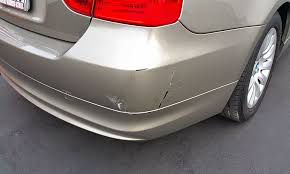

In [ ]:
sample_file = random.choice(train_damaged_list)
rotation = random.randint(-20,20)
augmentation = ImageDataGenerator(rotation_range=rotation,horizontal_flip=True)
sample_img = image.load_img('/content/drive/MyDrive/case_study/data1a/training/00-damage'+'/'+sample_file)
sample_img

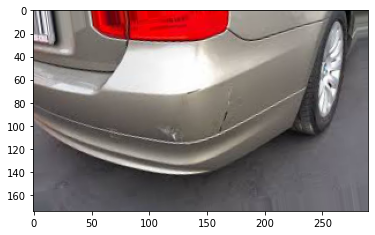

In [ ]:
sample_img_array = image.img_to_array(sample_img)
sample_img_array = sample_img_array.reshape((1,) + sample_img_array.shape)
samples = []
for arr,val in zip(augmentation.flow(sample_img_array, batch_size=1, save_format='jpg'),range(1)):
    img_save = image.array_to_img(arr[0], scale=False)
    samples.append(img_save)
plt.imshow(samples[0])


In [ ]:
train_save_path_1 = paths[0][0]
train_save_path_2 = paths[0][1]
test_save_path_1 = paths[1][0]
test_save_path_2 = paths[1][1]
print(train_save_path_1)
print(train_save_path_2)
print(test_save_path_1)
print(test_save_path_2)

data_augmentation_1/data_1/train/damaged
data_augmentation_1/data_1/train/not_damaged
data_augmentation_1/data_1/test/damaged
data_augmentation_1/data_1/test/not_damaged


In [ ]:
def create_images(name,save_path,image_path):
    rotation = random.randint(-20,20)
    augmentation = ImageDataGenerator(rotation_range=rotation,horizontal_flip=True)
    
    image_org = image.load_img(image_path+'/'+name)
    
    image_org.save(save_path+'/'+name)
    
    image_arr = image.img_to_array(image_org)
    
    image_arr = image_arr.reshape((1,) + image_arr.shape)
    
    for arr,val in zip(augmentation.flow(image_arr, batch_size=1, save_format='jpeg'),range(1)):
        name = name.split('.')[0]
        img_save = image.array_to_img(arr[0], scale=False)
        img_save.save(save_path+'/'+name+'_aug_'+str(val)+'.jpeg')
    return paths

In [ ]:
def save_images(name,save_path,image_path):
    image_org = image.load_img(image_path+'/'+name)
    image_org.save(save_path+'/'+name)

In [ ]:
for i in tqdm(train_damaged_list):
    create_images(i,train_save_path_1,'/content/drive/MyDrive/case_study/data1a/training/00-damage')
for i in tqdm(train_not_damaged_list):
    create_images(i,train_save_path_2,'/content/drive/MyDrive/case_study/data1a/training/01-whole')
for i in tqdm(test_damaged_list):
    save_images(i,test_save_path_1,'/content/drive/MyDrive/case_study/data1a/validation/00-damage')
for i in tqdm(test_not_damaged_list):
    save_images(i,test_save_path_2,'/content/drive/MyDrive/case_study/data1a/validation/01-whole')

100%|██████████| 230/230 [00:55<00:00,  4.15it/s]


In [ ]:
data_1_files = len(os.listdir('data_augmentation_1/data_1/train/damaged'))+len(os.listdir('data_augmentation_1/data_1/train/not_damaged'))
print('Number of files for all classes damaged, not damaged is ',data_1_files)


Number of files for all classes damaged, not damaged is  3680


#Model(keras)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import decode_predictions as vdecode_predictions
from tensorflow.keras.applications.resnet50 import decode_predictions as rdecode_predictions
from keras.applications.inception_v3 import decode_predictions as idecode_predictions

In [14]:
# from Keras GitHub  
def get_predictions(preds, top=5):
    global CLASS_INDEX
    if len(preds.shape) != 2 or preds.shape[1] != 1000:
        raise ValueError('`decode_predictions` expects '
                         'a batch of predictions '
                         '(i.e. a 2D array of shape (samples, 1000)). '
                         'Found array with shape: ' + str(preds.shape))
    if CLASS_INDEX is None:
        fpath = get_file('imagenet_class_index.json',
                         CLASS_INDEX_PATH,
                         cache_subdir='models')
        CLASS_INDEX = json.load(open(fpath))
    results = []
    for pred in preds:
        top_indices = pred.argsort()[-top:][::-1]
        # print('<<<<<<<<')
        # print(top_indices)
        # print('>>>>>>>>>')
        result = [tuple(CLASS_INDEX[str(i)]) + (pred[i],) for i in top_indices]
        result.sort(key=lambda x: x[2], reverse=True)
        results.append(result)
    return results

In [10]:
CLASS_INDEX = None
CLASS_INDEX_PATH = 'https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json'

In [11]:
def prepare_image(img_path):
    img = load_img(img_path, target_size=(224, 224))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

In [15]:
def get_car_categories(model,pred):
    d = defaultdict(float)
    img_list = os.listdir('/content/drive/MyDrive/case_study/data1a/training/01-whole')
    for i, img_path in enumerate(img_list):
        img = prepare_image('/content/drive/MyDrive/case_study/data1a/training/01-whole/'+img_path)
        print(img_path)
        out = model.predict(img)
        label = pred(out)
        # retrieve the most likely result, e.g. highest probability
        label = label[0][0]
        # print the classification
        print('%s (%.2f%%)' % (label[1], label[2]*100))
        top = get_predictions(out, top=5)
        # print(top)
        for j in top[0]:
            d[j[0:2]] += j[2]
        # if(i==20):
        #   break    
        
    return Counter(d)

In [16]:
vgg16 = VGG16(weights='imagenet')
cat_counter = get_car_categories(vgg16,vdecode_predictions)
print("ddd")
print(cat_counter)

0464.jpg
minivan (47.35%)
0783.jpg
beach_wagon (50.56%)
0375.jpg
sports_car (33.00%)
0411.jpg
racer (39.40%)
0036.jpg
convertible (35.28%)
0347.jpg
pickup (47.07%)
0351.jpg
convertible (34.10%)
0242.jpg
pickup (35.38%)
0572.jpg
police_van (53.25%)
0293.jpg
limousine (38.93%)
0027.jpg
sports_car (94.82%)
0284.jpg
minivan (90.18%)
0618.jpg
limousine (19.43%)
0340.jpg
beach_wagon (23.35%)
0362.jpg
ambulance (40.16%)
0181.jpg
sports_car (46.34%)
0185.jpg
minivan (20.10%)
0373.jpg
convertible (61.13%)
0124.jpg
sports_car (25.56%)
0013.jpg
minivan (89.02%)
0689.jpg
minibus (37.69%)
0644.jpg
limousine (86.79%)
0197.jpg
minivan (73.06%)
0318.jpg
pickup (21.03%)
0054.jpg
sports_car (72.62%)
0275.jpg
convertible (35.65%)
0188.jpg
sports_car (34.64%)
0685.jpg
cab (19.27%)
0187.jpg
limousine (22.58%)
0229.jpg
jeep (50.71%)
0155.jpg
minivan (32.50%)
0511.jpg
minivan (49.84%)
0574.jpg
pickup (38.30%)
0082.jpg
trailer_truck (65.15%)
0165.jpg
sports_car (76.52%)
0244.jpg
cab (55.06%)
0407.jpg
sports_c

In [18]:
print(cat_counter)

Counter({('n03770679', 'minivan'): 132.04885696154088, ('n04285008', 'sports_car'): 116.2507775942795, ('n03100240', 'convertible'): 91.41381151380483, ('n02814533', 'beach_wagon'): 67.8161874251382, ('n03930630', 'pickup'): 65.00294556395966, ('n03670208', 'limousine'): 53.60916930512758, ('n04037443', 'racer'): 39.56545832508709, ('n03594945', 'jeep'): 30.023129711509682, ('n03769881', 'minibus'): 20.39658945822157, ('n04461696', 'tow_truck'): 18.774353622924536, ('n03459775', 'grille'): 18.050606920805876, ('n02930766', 'cab'): 17.854768497578334, ('n02974003', 'car_wheel'): 17.176705986639718, ('n03796401', 'moving_van'): 14.755287888576277, ('n03977966', 'police_van'): 10.421009820885956, ('n04252225', 'snowplow'): 7.086040475696791, ('n02701002', 'ambulance'): 5.562829777249135, ('n04065272', 'recreational_vehicle'): 3.719217335106805, ('n04467665', 'trailer_truck'): 3.239225470344536, ('n03445924', 'golfcart'): 2.6788829541765153, ('n03345487', 'fire_engine'): 2.6690694177523255

In [22]:
cat_list = [k for k, v in cat_counter.most_common()[:20]]


In [23]:
def validate(image_path):
    print(image_path)
    image_path='/content/drive/MyDrive/sample/'+image_path
    img = prepare_image(image_path)
    out = vgg16.predict(img)
   
    display(Image(image_path))
   
    top = get_predictions(out, top=5)
    print(top[0])
    # for j in top[0]:
    if top[0][0][0:2] in cat_list:
        return( "IMAGE IS A CAR")
           
    return("IMAGE IS NOT A CAR")

bg_graz_368.jpg


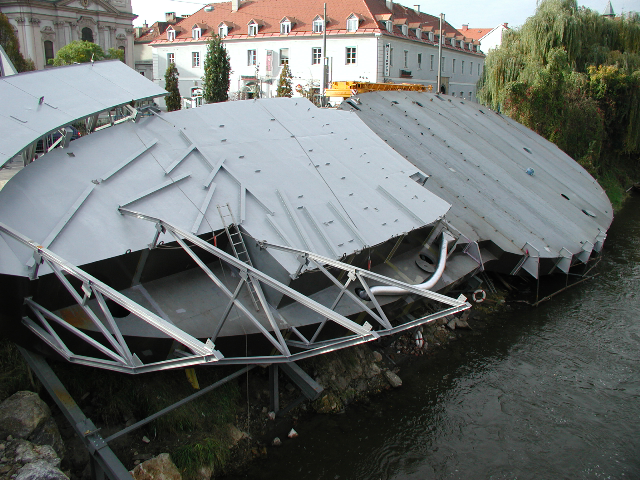

[('n04258138', 'solar_dish', 0.80638826), ('n04606251', 'wreck', 0.112479515), ('n04044716', 'radio_telescope', 0.02166955), ('n03216828', 'dock', 0.015088953), ('n03220513', 'dome', 0.008828891)]
IMAGE IS NOT A CAR

bg_graz_369.jpg


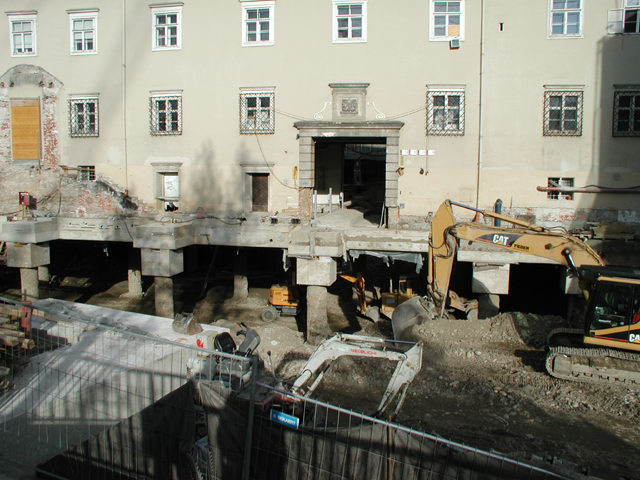

[('n04507155', 'umbrella', 0.073085964), ('n04204347', 'shopping_cart', 0.061139148), ('n04335435', 'streetcar', 0.042809192), ('n03388043', 'fountain', 0.032545146), ('n03216828', 'dock', 0.03250067)]
IMAGE IS NOT A CAR

bg_graz_260.jpg


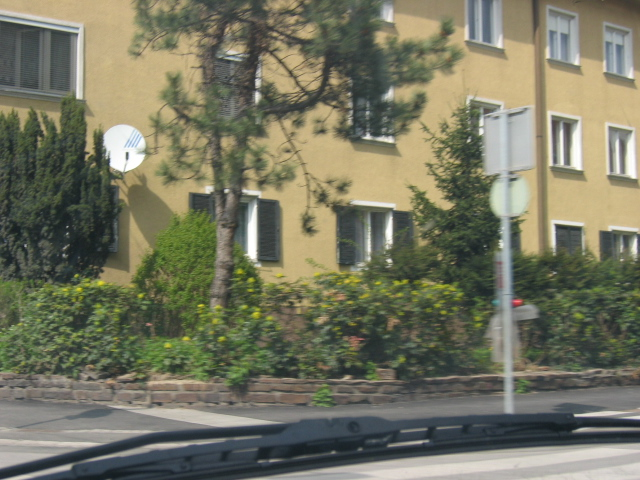

[('n03670208', 'limousine', 0.25249287), ('n03100240', 'convertible', 0.05269904), ('n04335435', 'streetcar', 0.05041165), ('n06874185', 'traffic_light', 0.039697636), ('n03770679', 'minivan', 0.03619763)]
IMAGE IS A CAR

bg_graz_261.jpg


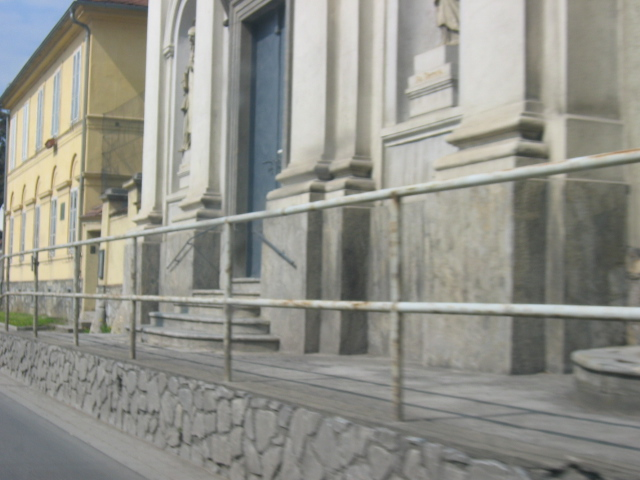

[('n04005630', 'prison', 0.25924578), ('n02788148', 'bannister', 0.11987649), ('n03776460', 'mobile_home', 0.06724692), ('n03000134', 'chainlink_fence', 0.036649685), ('n03877845', 'palace', 0.027361201)]
IMAGE IS NOT A CAR

Copy of 0227.JPEG


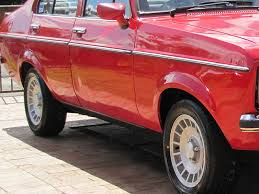

[('n03930630', 'pickup', 0.3279202), ('n02814533', 'beach_wagon', 0.2230843), ('n03100240', 'convertible', 0.16112998), ('n03770679', 'minivan', 0.06698909), ('n03594945', 'jeep', 0.046083003)]
IMAGE IS A CAR

Copy of 0228.JPEG


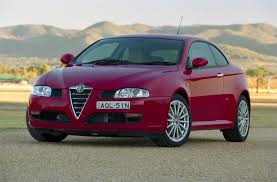

[('n04285008', 'sports_car', 0.47092834), ('n04037443', 'racer', 0.24283795), ('n02974003', 'car_wheel', 0.06446868), ('n03100240', 'convertible', 0.06328207), ('n02814533', 'beach_wagon', 0.034174044)]
IMAGE IS A CAR

road.jpg


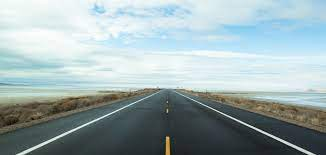

[('n04592741', 'wing', 0.24368611), ('n03160309', 'dam', 0.19624811), ('n03933933', 'pier', 0.102095515), ('n03457902', 'greenhouse', 0.056049727), ('n04467665', 'trailer_truck', 0.050516654)]
IMAGE IS NOT A CAR

6170539e-5b04-40c2-8697-b41a8d9a0cb2.jpg


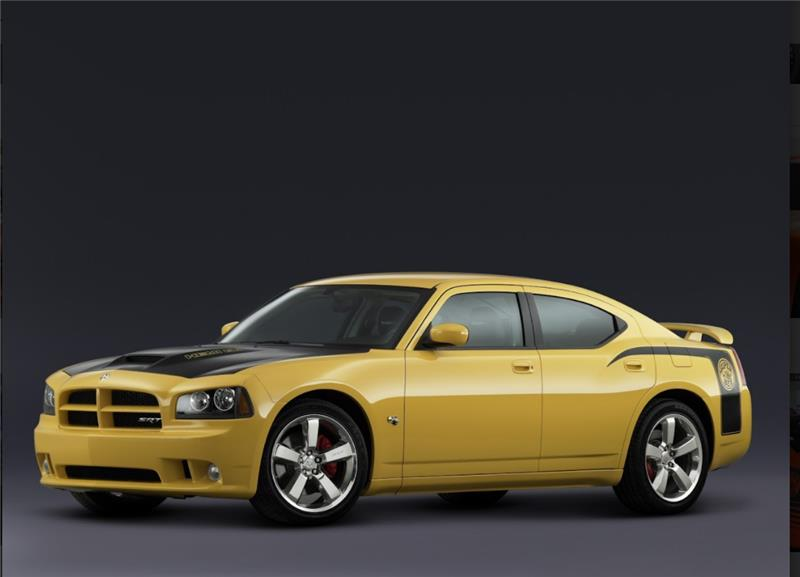

[('n02930766', 'cab', 0.3281609), ('n04285008', 'sports_car', 0.23296072), ('n02814533', 'beach_wagon', 0.15260565), ('n04037443', 'racer', 0.07688907), ('n02974003', 'car_wheel', 0.074232265)]
IMAGE IS A CAR

8e24859d-8365-4fa5-b67c-2b7ed4107abe.jpg


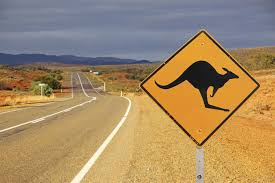

[('n04355338', 'sundial', 0.11257541), ('n04044716', 'radio_telescope', 0.09739951), ('n04467665', 'trailer_truck', 0.07046805), ('n03160309', 'dam', 0.056794405), ('n02894605', 'breakwater', 0.055726398)]
IMAGE IS NOT A CAR

bbacab0a-2ab9-468b-b543-c3e8df4d63b6.jpg


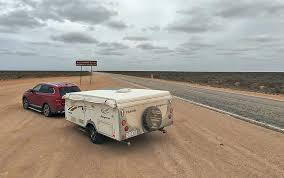

[('n04467665', 'trailer_truck', 0.45421794), ('n04461696', 'tow_truck', 0.08983678), ('n03384352', 'forklift', 0.05247745), ('n03796401', 'moving_van', 0.050263654), ('n03776460', 'mobile_home', 0.046691105)]
IMAGE IS A CAR

c4bc638c-c9bd-4208-bb95-380eb87cd23f.jpg


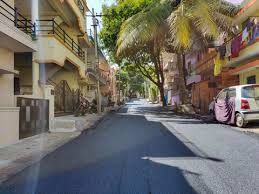

[('n04335435', 'streetcar', 0.06492336), ('n03417042', 'garbage_truck', 0.064416006), ('n03599486', 'jinrikisha', 0.025444862), ('n03769881', 'minibus', 0.021631287), ('n04417672', 'thatch', 0.017926803)]
IMAGE IS NOT A CAR

2d32df30-ed46-4990-9d47-d0e798855f4a.jpg


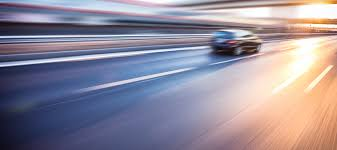

[('n02917067', 'bullet_train', 0.3912534), ('n02966193', 'carousel', 0.06976919), ('n02965783', 'car_mirror', 0.06363695), ('n02930766', 'cab', 0.062688), ('n04467665', 'trailer_truck', 0.048106153)]
IMAGE IS NOT A CAR

8f253f12-7ffa-49b9-b24f-5ca64a432f7b.jpg


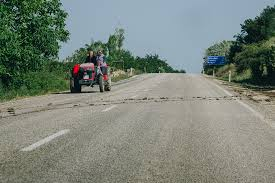

[('n04613696', 'yurt', 0.21074124), ('n09472597', 'volcano', 0.14811033), ('n04310018', 'steam_locomotive', 0.0850149), ('n03868242', 'oxcart', 0.04764976), ('n09288635', 'geyser', 0.042316075)]
IMAGE IS NOT A CAR

0035.JPEG


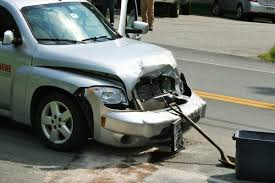

[('n04461696', 'tow_truck', 0.44314456), ('n03930630', 'pickup', 0.13660759), ('n03796401', 'moving_van', 0.09439376), ('n03769881', 'minibus', 0.03953107), ('n04467665', 'trailer_truck', 0.03754696)]
IMAGE IS A CAR

0072.JPEG


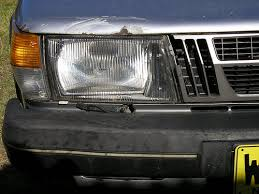

[('n03459775', 'grille', 0.42888394), ('n03930630', 'pickup', 0.088297896), ('n02930766', 'cab', 0.08350195), ('n03594945', 'jeep', 0.07011581), ('n03770679', 'minivan', 0.06959565)]
IMAGE IS A CAR



In [24]:
img_list = os.listdir('/content/drive/MyDrive/sample')
for i, image_path in enumerate(img_list):
  print(validate(image_path))
  print()
    
